In [1]:
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt

## Problema 14

In [2]:
#Voy a calcular log10(Omega(A,D))
L=100
D=1.5
A=int(0.15*L**2)
#Definamos algunas variables

In [3]:
def u(k,A,D):
    return [int((2**(D-2)-1)*A*2**(-k*D)+i/4) for i in range(4)]
def v(k,A,D):
    return [int(-A*2**(-k*D)+(i+1)/4) for i in range(3)]
#Estos son los vectores u(k) v(k) de argumento de la fución hipergeom.

In [4]:
u(1,A,D) #por ejemplo para k=1

[-155, -155, -154, -154]

In [5]:
v(1,A,D)

[-530, -529, -529]

In [6]:
#4F3(u,v,1)
def F(k,A,D):
    return mp.re(mp.hyper(u(k,A,D),v(k,A,D),1,maxprec=100000))
#También tuve que aumentar el parámetro maxprec por que a veces no convergía
#También tomo la parte real, por que a veces tira complejos (??

In [7]:
F(3,A,D)

mpf('0.64755760186640299')

In [8]:
m=int(np.log2(L/2))
def Dmin(A,m):
    return np.amin([np.log2(A)/m,2])
def Dmax(A,m,L):
    return np.amin([np.log2(A/(L**2))/m+2,2])

In [9]:
def Bi(k,A,D):
    return mp.binomial(4*A*2**(-k*D),A*2**(-k*D+D))
#Este es el término binomial acompañando la función hipergeom.

In [10]:
mp.log10(Bi(1,A,D))
#es muy grande, así que veamos sólo el exponente.

mpf('555.39629169447835')

In [11]:
def LogOM(A,D):
    Lom=0
    for i in range(1,5):
        try:
            Lom=Lom+mp.re(mp.log10(F(i,A,D)*Bi(i,A,D))) #sumo sobre k
        except:
            pass
    return Lom

In [12]:
LogOM(A,D)

mpf('840.2501572397756')

In [13]:
N=50
A1=int(0.07*L**2)
x1=np.linspace(Dmin(A1,m),Dmax(A1,m,L),N)
LogOm1=np.zeros(N)
A2=int(0.15*L**2)
x2=np.linspace(Dmin(A2,m),Dmax(A2,m,L),N)
LogOm2=np.zeros(N)
A3=int(0.3*L**2)
x3=np.linspace(Dmin(A3,m),Dmax(A3,m,L),N)
LogOm3=np.zeros(N)
A4=int(0.6*L**2)
x4=np.linspace(Dmin(A4,m),Dmax(A4,m,L),N)
LogOm4=np.zeros(N)
for i in range(N):
    LogOm1[i]=LogOM(A1,x1[i])
    LogOm2[i]=LogOM(A2,x2[i])
    LogOm3[i]=LogOM(A3,x3[i])
    LogOm4[i]=LogOM(A4,x4[i])

#Preparo log10(Omega) para varios r

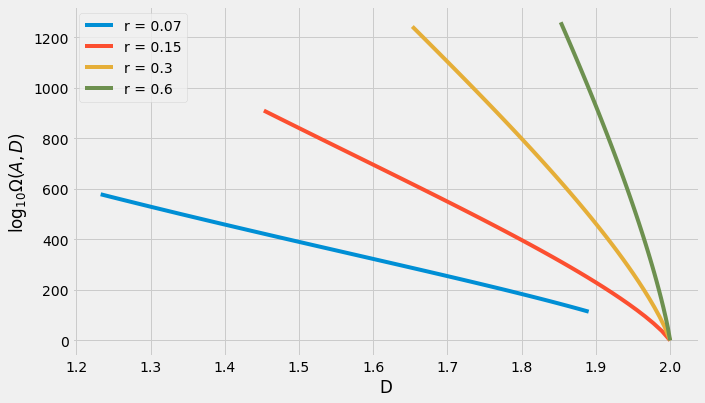

In [14]:
plt.style.use("fivethirtyeight") #plot
fig = plt.figure(figsize=(10,6))
plt.plot(x1,LogOm1,label="r = 0.07")
plt.plot(x2,LogOm2,label="r = 0.15")
plt.plot(x3,LogOm3,label="r = 0.3")
plt.plot(x4,LogOm4,label="r = 0.6")
plt.legend()
plt.ylabel(r'$\log_{10} \Omega(A,D)$')
plt.xlabel("D")
plt.show()

## Problema 16

In [15]:
#ahora voy a calcular la entropía

def Lower(D,m):
    return 2**(m*D)
def Upper(D,m,L):
    return (L**2)*2**(m*(D-2))
#defino L(D),U(D)

In [16]:
print(Lower(1.2,m),Upper(1.2,m,L)) #ejemplo

64.0 625.0


In [17]:
def S(D,m,L,N):
    Entropies=[mp.re(LogOM(Lower(D,m)+(i/N)*(Upper(D,m,L)-Lower(D,m)),D)) for i in range(N+1)]
    return (Entropies)
#defino la entropía, donde N es la cantidad de barridos que hace el área desde L(D) y U(D)
#en general debería escribir la suma desde L hasta U, pero el término A=U es taaaaan grande respecto a los otros
#que termino tomando sólo ese, con np.amax.

In [18]:
S(1.85,m,L,10) #aquí vemos lo grande que es el término con U respecto por ejemplo al anterior. 100 órdenes de mag. mayor!

[mpf('126.57589366331385'),
 mpf('240.07918171973972'),
 mpf('353.78604964241418'),
 mpf('467.58220675974025'),
 mpf('581.42986159460315'),
 mpf('695.31018470218351'),
 mpf('809.21371059413013'),
 mpf('923.1335330977048'),
 mpf('1037.0669843616249'),
 mpf('1151.0107411585902'),
 mpf('1264.9629671174371')]

In [19]:
N2=100
x=np.linspace(0,2,N2)
Ses=np.zeros(N2)
for i in range(N2):
    Ses[i]=np.amax(S(x[i],m,L,2))
#barro en D, y pongo los Términos con A=U(D) usando np.amax. No hace falta poner N grande, usé N=2

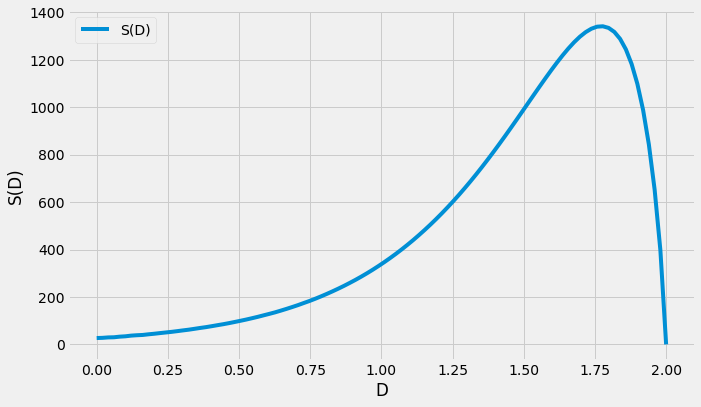

In [20]:
plt.style.use("fivethirtyeight") #plot
fig = plt.figure(figsize=(10,6))
plt.plot(x,Ses,label='S(D)')
plt.legend()
plt.ylabel('S(D)')
plt.xlabel("D")
plt.show()

In [21]:
#h=1./(m*np.log(2))
#Sesdisplaced=np.zeros(N2)
#for i in range(N2):
#    Sesdisplaced[i]=np.amax(S(x[i]+h,m,L,2))/(h*2**(m*h))

In [22]:
mx1=x[np.argmax(Ses)]
mx2=x[np.argmax(np.gradient(Ses))]
mx3=x[np.argmax(np.gradient(np.gradient(Ses)))] #los máximos de las derivadas

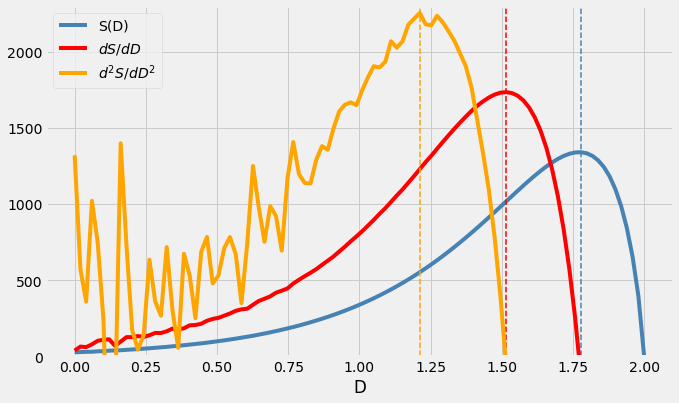

In [23]:
plt.style.use("fivethirtyeight") #plot
fig = plt.figure(figsize=(10,6))
plt.plot(x,Ses,label='S(D)',color='steelblue')
plt.vlines(mx1,0,2300,linewidth=1.5,linestyle='dashed',color='steelblue')
plt.plot(x,np.gradient(Ses)/(x[1]-x[0]),label=r'$dS/dD$',color='red')
plt.vlines(mx2,0,2300,linewidth=1.5,linestyle='dashed',color='red')
plt.plot(x,np.gradient(np.gradient(Ses)/(x[1]-x[0]))/(x[1]-x[0]),label=r'$d^2S/dD^2$',color='orange')
plt.vlines(mx3,0,2300,linewidth=1.5,linestyle='dashed',color='orange')
plt.ylim([0,2300])
plt.legend(loc='upper left')
plt.xlabel("D")
plt.show()

In [24]:
print(mx3-mx2,mx2-mx1) #diferencias
#no da tan bien, pero es por errores numéricos, lo hago después con la aproximada...

-0.3030303030303032 -0.26262626262626254


## Problema 18

In [25]:
Ndim=2 #defino la dimension del espacio
m=int(np.log2(100//2)) #defino m
def H(x): #defino la función de Shannon
    if (x<1 and x>0):
        return ( -x*np.log10(x) - (1-x)*np.log10(1-x) )
    else: 
        return 0

In [26]:
x=np.linspace(0,2,N2) 
Saprox=[(L/2**(m-1))**Ndim * H(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x] 
#la entropía aproximada
Saprox[0]=(L/2**(m-1))**Ndim * H(2**(-Ndim)) * m 
#tiene un error en cero, asi que ahí la defino como el límite

C:\Users\nickg\AppData\Local\Temp\ipykernel_1612\2078477219.py:2: RuntimeWarning: invalid value encountered in double_scalars
  Saprox=[(L/2**(m-1))**Ndim * H(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x]


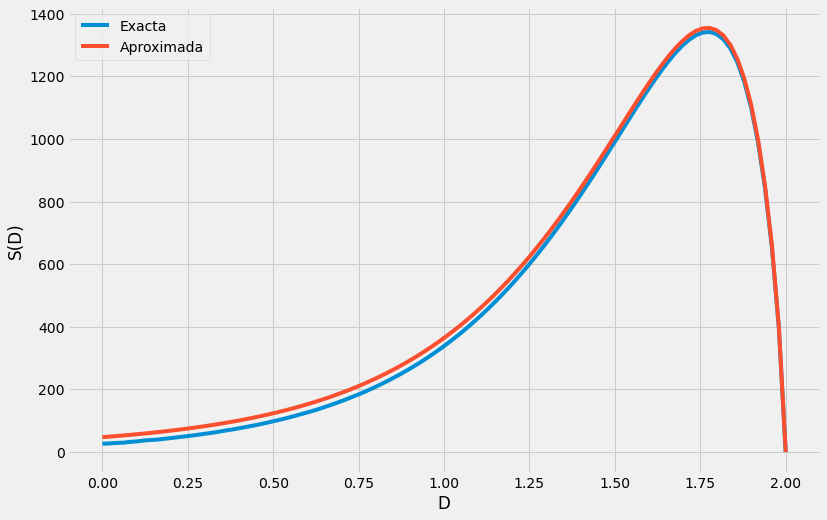

In [27]:
plt.style.use("fivethirtyeight") 
#ploteo la exacta y la aproximada
fig = plt.figure(figsize=(12,8))
plt.plot(x,Ses,label="Exacta")
plt.plot(x,Saprox,label="Aproximada")
plt.legend()
plt.ylabel('S(D)')
plt.xlabel("D")
plt.show()

In [28]:
mx1a=x[np.argmax(Saprox)]
mx2a=x[np.argmax(np.gradient(Saprox))]
mx3a=x[np.argmax(np.gradient(np.gradient(Saprox)))] 
#los máximos de sus derivadas

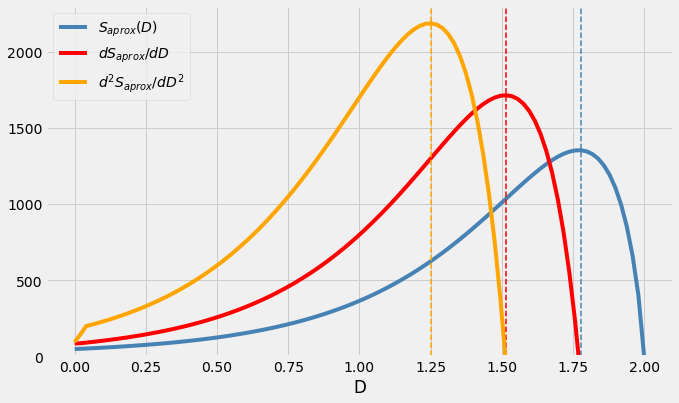

In [29]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(10,6))
plt.plot(x,Saprox,label=r'$S_{aprox}(D)$',color='steelblue')
plt.vlines(mx1a,0,2300,linewidth=1.5,linestyle='dashed',color='steelblue')
plt.plot(x,np.gradient(Saprox)/(x[1]-x[0]),label=r'$dS_{aprox}/dD$',color='red')
plt.vlines(mx2a,0,2300,linewidth=1.5,linestyle='dashed',color='red')
plt.plot(x,np.gradient(np.gradient(Saprox)/(x[1]-x[0]))/(x[1]-x[0]),label=r'$d^2S_{aprox}/dD^2$',color='orange')
plt.vlines(mx3a,0,2300,linewidth=1.5,linestyle='dashed',color='orange')
plt.ylim([0,2300])
plt.legend(loc='upper left')
plt.xlabel("D")
plt.show()

In [30]:
print(mx3a-mx2a,mx2a-mx1a)
#ahora da mucho mejor

-0.26262626262626276 -0.26262626262626254


## Problema 19

In [31]:
def H2(x): #defino la función de Shannon con log 2 esta vez...
    if (x<1 and x>0):
        return ( -x*np.log2(x) - (1-x)*np.log2(1-x) )
    else: 
        return 0

C:\Users\nickg\AppData\Local\Temp\ipykernel_1612\3665417859.py:9: RuntimeWarning: invalid value encountered in double_scalars
  Sapro=[(L/(2**(m-1)))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x]
C:\Users\nickg\AppData\Local\Temp\ipykernel_1612\3665417859.py:9: RuntimeWarning: invalid value encountered in double_scalars
  Sapro=[(L/(2**(m-1)))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x]
C:\Users\nickg\AppData\Local\Temp\ipykernel_1612\3665417859.py:9: RuntimeWarning: invalid value encountered in double_scalars
  Sapro=[(L/(2**(m-1)))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x]
C:\Users\nickg\AppData\Local\Temp\ipykernel_1612\3665417859.py:9: RuntimeWarning: invalid value encountered in double_scalars
  Sapro=[(L/(2**(m-1)))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x]
C:\Users\nickg\AppData\Local\Temp\ipykernel_1612\3665417859.py:9: RuntimeWarning: invalid value encountered in double_scalars
  Sapro=[(L/(2**(m-1)))**N

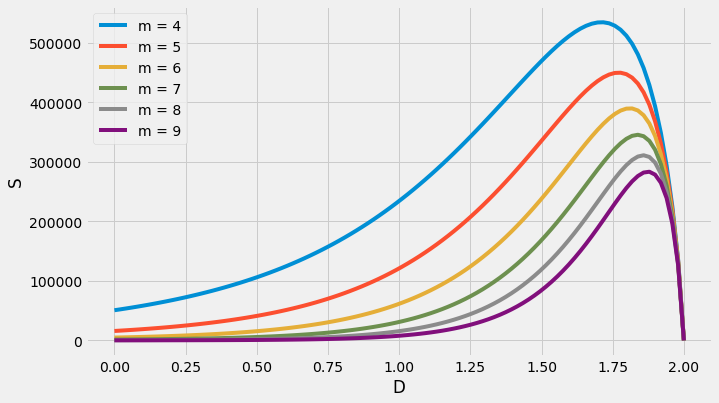

In [32]:
L=1000
Ndim=2
nr=int(np.log2(L)) #nr es hasta donde voy con los m
Ma=np.zeros(nr-3)
fig = plt.figure(figsize=(10,6))
for i in range(3,nr):
    x=np.linspace(0,Ndim,N2)
    m=i+1 #defino m, en este caso 4<m<9
    Sapro=[(L/(2**(m-1)))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x] 
    #calculo entropia, tira banda de errores pero son solo warnings
    Sapro[0]=(L/(2**(m-1)))**Ndim * H2(2**(-Ndim)) * m  
    #que los arreglo con esto
    Ma[i-3]=np.amax(Sapro) #saco maximo
    plt.plot(x,Sapro,label="m = "+str(m)) 
    #ploteo, aunque no es necesario
plt.legend()
plt.xlabel("D")
plt.ylabel("S")
plt.show()

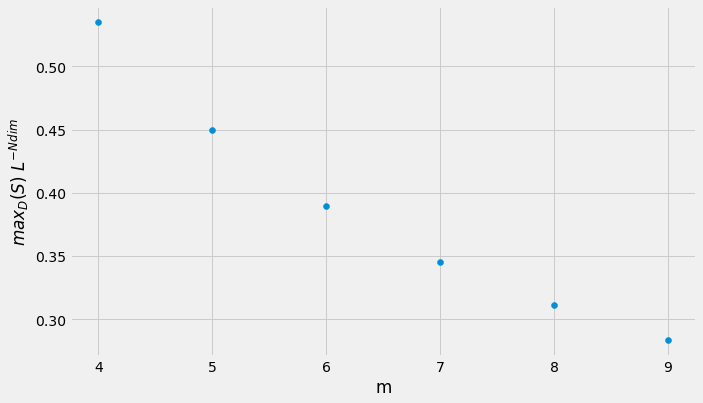

In [33]:
fig = plt.figure(figsize=(10,6))
plt.scatter(np.linspace(4,nr,nr-3),Ma/(L**Ndim)) 
#ploteo los máximos sobre L a la dimension
plt.xlabel("m")
plt.ylabel(r'$max_D(S) \ L^{-Ndim}$')
plt.show()

C:\Users\nickg\AppData\Local\Temp\ipykernel_1612\311231902.py:8: RuntimeWarning: invalid value encountered in double_scalars
  Sapro=[(L/(2**(m-1)))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x]


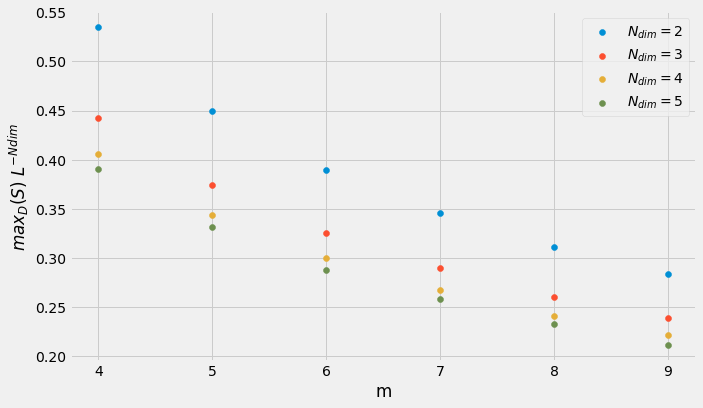

In [34]:
fig = plt.figure(figsize=(10,6)) #voy cambiando la dimensión y obtengo el gráfico deseado
for j in range(2,6):
    Ndim=j #j itera sobre la dimensión
    Ma=np.zeros(nr-3)
    for i in range(3,nr):
        x=np.linspace(0,Ndim,N2)
        m=i+1
        Sapro=[(L/(2**(m-1)))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x] 
        Sapro[0]=(L/(2**(m-1)))**Ndim * H2(2**(-Ndim)) * m 
        Ma[i-3]=np.amax(Sapro)
    plt.scatter(np.linspace(4,nr,nr-3),Ma/(L**Ndim),label=r'$N_{dim}=$'+str(j))
plt.legend()
plt.xlabel("m")
plt.ylabel(r'$max_D(S) \ L^{-Ndim}$')
plt.show()

## Problema 20

In [67]:
L=100
Ndim=50
m=int(np.log2(L/2))
x=np.linspace(46,50,500) 
Saprox=[(L/2**(m-1))**Ndim * H2(2**(d-Ndim)) * (2**(m*d)-1) / (2**d-1) for d in x] #la entropía aproximada
Saprox[0]=(L/2**(m-1))**Ndim * H2(2**(-Ndim)) * m #tiene un error en cero, asi que ahí la defino como el límite
mx1a=x[np.argmax(Saprox)] #d1
mx2a=x[np.argmax(np.gradient(Saprox))] #d2
mx3a=x[np.argmax(np.gradient(np.gradient(Saprox)))] #d3

In [68]:
mx2a-mx1a

-0.2404809619238435

In [95]:
Sprime=np.gradient(Saprox)/(x[1]-x[0]) #derivada
ERR=np.zeros((40,40))
for i in range(40):
    for j in range(40):
        b=0.22+i*0.001
        A=1.35+j*0.01
        Smoved=np.array([A*(L/2**(m-1))**Ndim * H2(2**(d+b-Ndim)) * (2**(m*(d+b))-1) / (2**(d+b)-1) for d in x]) 
        #S movida y escaleada
        Serr=np.sum((np.array(Sprime[np.where(x<50-b)])-np.array(Smoved[np.where(x<50-b)]))**2) 
        #error a minimizar
        ERR[i,j]=Serr
b=0.226 #traslacion
A=1.45 #escaleo
Smoved=np.array([A*(L/2**(m-1))**Ndim * H2(2**(d+b-Ndim)) * (2**(m*(d+b))-1) / (2**(d+b)-1) for d in x]) 
#S movida y escaleada
Serr=np.sum((np.array(Sprime[np.where(x<50-b)])-np.array(Smoved[np.where(x<50-b)]))**2) 
#error a minimizar
print(A,b,Serr)

1.45 0.226 1.1934642798626262e+198


In [98]:
np.amin(ERR)
ERR[6,10]=7e199

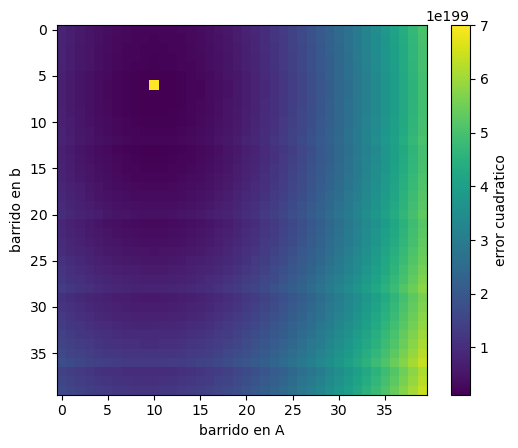

In [99]:
plt.style.use("default")
fig,ax = plt.subplots()
cb=ax.imshow(ERR)
plt.colorbar(cb,label="error cuadratico")
plt.xlabel("barrido en A")
plt.ylabel("barrido en b")
plt.show()

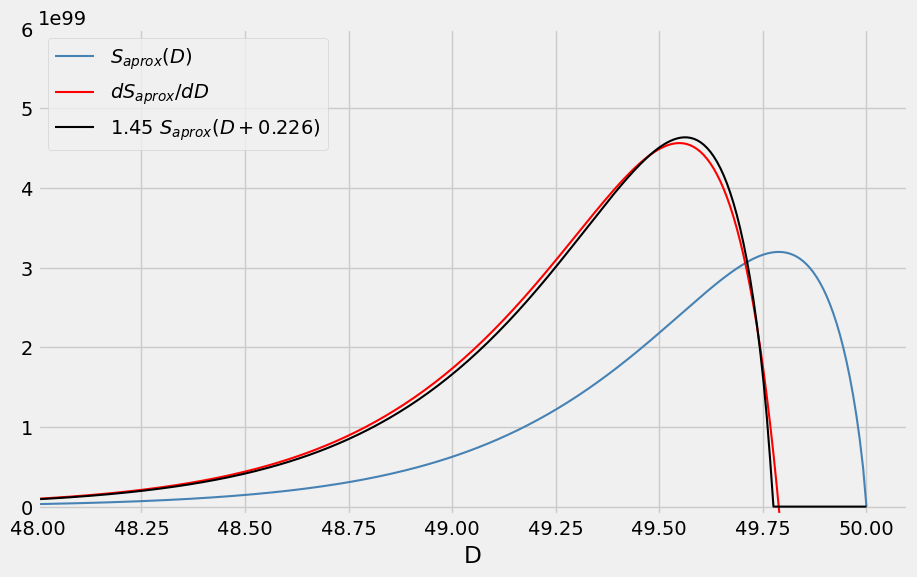

In [101]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(10,6))
plt.plot(x,Saprox,linewidth=1.5,label=r'$S_{aprox}(D)$',color='steelblue')
#plt.vlines(mx1a,0,1.7e99,linewidth=1.5,linestyle='dashed',color='steelblue')
plt.plot(x,Sprime,linewidth=1.5,label=r'$dS_{aprox}/dD$',color='red')
#plt.vlines(mx2a,0,1.7e99,linewidth=1.5,linestyle='dashed',color='red')
plt.plot(x,Smoved,linewidth=1.5,label=r'$1.45 \ S_{aprox}(D+0.226)$',color='black')
plt.ylim([-1e98,6e99])
plt.xlim([48,50.1])
plt.legend(loc='upper left')
plt.xlabel("D")
plt.show()